In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# auto reload the objects
%load_ext autoreload
%autoreload 2
import re
import pandas as pd
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
import numpy as np
import os
#os.getcwd()
# enable interactive plotly in notebook
import plotly.express as px
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected = True)
import sklearn.datasets
from scipy.stats import stats
import requests
import pandas as pd
!pip install umap-learn
import umap as UMAP
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
#!pip install numba==0.55.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 33.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1cebbb754ce3f041d4b4348a811838007f8b89698874fc619a8fccebafcdc18a
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=ab0693dbaa0e791d8fb69ac4f7951aecc60991991cf21da9cc8b64dc3b721941
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [17]:
clinical_clean = pd.read_csv("/content/drive/MyDrive/o-miner/dataset/gbm_tcga_pan_can_atlas_2018/TCGA_142_clinical_May6.txt",sep="\t")
clinical_clean.head()
transcriptome = pd.read_csv("/content/drive/MyDrive/o-miner/output/transcriptome.txt",sep="\t",index_col=0)
transcriptome.head()
candidate = pd.read_csv("/content/drive/MyDrive/o-miner/output/candidates_911.txt",sep="\t")
candidate.head()

,gene symbol
0,DLX6
1,NAB2
2,FBP1
3,TLX1
4,H3F3A


In [18]:
mtx_type_pd = transcriptome.merge(clinical_clean[['SAMPLE_ID','Gene_Expression_Subtype','vital_status','DSS.time']],left_index=True, right_on = "SAMPLE_ID", how = "left")
mtx_type_pd = mtx_type_pd[mtx_type_pd.columns[-4:].append(mtx_type_pd.columns[mtx_type_pd.columns.isin(list(candidate['gene symbol']))])]
mtx_type_pd = mtx_type_pd[~pd.isna(mtx_type_pd['Gene_Expression_Subtype'])]
mtx_type_pd = mtx_type_pd[mtx_type_pd.Gene_Expression_Subtype!='Neural']
mtx_type_pd = mtx_type_pd.reset_index(drop=True)

In [ ]:
mtx_type_pd

,SAMPLE_ID,Gene_Expression_Subtype,vital_status,DSS.time,ABCA6,...,ZNF384,ZNF521,ZNF560,ZNF695,ZRSR2
0,TCGA-02-0047-01,Proneural,Dead,448.0,0.6853,...,-1.0165,-0.5599,0.5847,0.5233,-1.1243
1,TCGA-02-0055-01,Mesenchymal,Dead,76.0,0.8023,...,-1.1584,-0.7806,0.7610,1.1806,1.4716
2,TCGA-02-2485-01,Classical,Alive,470.0,-0.5379,...,1.0085,0.7577,-0.1330,-1.1050,-0.2762
3,TCGA-02-2486-01,Mesenchymal,Dead,618.0,0.6180,...,-0.9980,-1.1557,-1.1161,-0.7956,1.1523
4,TCGA-06-0125-01,Classical,Dead,1448.0,-0.0689,...,0.7755,0.7257,-0.0062,-0.7387,1.3021
...,...,...,...,...,...,...,...,...,...,...,...
111,TCGA-76-4925-01,Proneural,Dead,146.0,-1.2294,...,0.6245,0.5288,-0.7286,-0.8318,-0.0458
112,TCGA-76-4926-01,Classical,Dead,138.0,2.0147,...,-0.6271,1.1673,-0.5649,0.7975,-0.3860
113,TCGA-76-4928-01,Classical,Dead,94.0,2.2640,...,-0.3066,-0.7741,-0.3092,-0.9639,1.3553
114,TCGA-76-4931-01,Classical,Dead,279.0,-1.2790,...,1.1987,0.2250,0.5839,-0.9266,1.1906


In [ ]:
#!pip install workqueue
from scipy.stats import zscore
import scipy
def INHD(pd_3d,colname,**kwargs):
    INHD = []
    names = []
    array_size = [0,1,2] if 'dimension' in kwargs.keys() and kwargs['dimension'].upper() == '3D' else [0,1]
    for moltype in pd_3d.type.unique():
        pd_3d_sel = pd_3d.loc[pd_3d.type.isin([moltype]),:]
        INHD.append(np.mean(
            scipy.spatial.distance.pdist(
                np.array(pd_3d_sel[array_size]), metric='sqeuclidean'
            )
        )/np.mean(
            scipy.spatial.distance.pdist(
                np.array(pd_3d[array_size]), metric='sqeuclidean'
            )
        ))
        names.append(moltype)
    INHD = pd.DataFrame(INHD)
    INHD.index = names
    INHD.columns = [colname]
    return(INHD)
###############
### densmap ###
###############
#py.init_notebook_mode()
#!pip install densmap-learn
from bokeh.palettes import Category10_4, Category20, Category20b, Category20c
color_discrete_map1={
    "Classical": Category10_4[0],
    "Mesenchymal": Category10_4[1],
    #"Neural": Category10_4[1],
    "Proneural": Category10_4[2]
}

from umap import UMAP
itm = 'Gene_Expression_Subtype'
# densmap_2d = densmap.densMAP(n_components=2,dens_frac=0.3,dens_lambda=0.1,random_state=0,
                          # var_shift = 0.1,n_neighbors=30,metric = "euclidean", 
                          # n_epochs=750, learning_rate = 1,
                          # min_dist = 0.1,spread = 1,set_op_mix_ratio = 1,
                          # local_connectivity = 1,repulsion_strength = 1,negative_sample_rate = 5,
                          # transform_queue_size = 4,target_n_neighbors = -1,target_weight = 0.5) # init='random',n_components=2,n_components=2, 
map_2d = UMAP(n_components=2,  random_state=0) #init='random',

embedding = mtx_type_pd.iloc[:,4:]
weight = 19
embedding['clinical'] = mtx_type_pd[['DSS.time']].apply(zscore)*weight
proj_2d = map_2d.fit_transform(embedding)

def plot_scatter(proj_2d,**kwargs):
    label = kwargs['label'] if 'label' in kwargs.keys() else 'densmap'
    itm = kwargs['itm'] if 'itm' in kwargs.keys() else 'Gene_Expression_Subtype'
    continuous = kwargs['continuous'] if 'continuous' in kwargs.keys() else 'No' 
    list_type = []   
    for moltype in mtx_type_pd[itm]:
        if moltype not in list_type:
            list_type.append(moltype)
    if continuous == 'No':
        fig_2d = px.scatter(
            proj_2d, x=0, y=1,
            color_discrete_sequence= list([color_discrete_map1[j] for j in list_type]),#["red", "green", "blue", "goldenrod"], #, "magenta"
            color=mtx_type_pd[itm], labels={'color': 'Type'},
            hover_name = mtx_type_pd["SAMPLE_ID"],
            width=800, height=600
        )
    else:
        fig_2d = px.scatter(
            proj_2d, x=0, y=1,
            color_continuous_scale='viridis',
            color=np.log(mtx_type_pd[itm])/np.log(10), labels={'color': 'log(DSS.time)'},
            hover_name = mtx_type_pd["SAMPLE_ID"],
            width=800, height=600
        )
        
    fig_2d.update_xaxes(title = label+"1")
    fig_2d.update_yaxes(title = label+"2")
    fig_2d.show(marker_size=5)

plot_scatter(proj_2d,label='umap',itm='Gene_Expression_Subtype',continuous='No')
# 2D expression in-network distance
pd_2d_gene = pd.DataFrame(proj_2d)
pd_2d_gene['type'] = mtx_type_pd[[itm]].reset_index(drop=True)
exp_2d_INHD = INHD(pd_2d_gene,'umap')
marker_2d_INHD = exp_2d_INHD
marker_2d_INHD
plot_scatter(proj_2d,label='umap',itm='DSS.time',continuous='Yes')

,umap
Proneural,0.730597
Mesenchymal,0.854110
Classical,0.770539


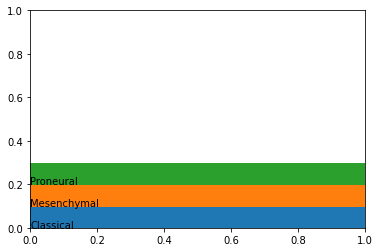

    'data': [{'hoverinfo': 'text',
              'marker': {'color': [#2ca02c, #…

In [ ]:
mtx_type_pd['V1'] = proj_2d[:,0]
mtx_type_pd['V2'] = proj_2d[:,1]
mtx_type_pd['sampleID'] = mtx_type_pd['SAMPLE_ID']
##################
### color test ###
##################
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import math

def test_color(color_discrete_map1):
    fig = plt.figure()
    ax = fig.add_subplot(111)   
    color = color_discrete_map1.values() #colors.cnames
    #print(len(color))
    ratio = 1.0 / 5.0
    count = math.ceil(math.sqrt(len(color)))
    x_count = count * ratio
    y_count = count / ratio
    x = 0
    y = 0
    w = 1 / x_count
    h = 1 / y_count    
    for cl_idx in range(0,len(color)):
        cl = list(color)[cl_idx]
        label = list(color_discrete_map1.keys())[cl_idx]
        #print(cl)
        pos = (x / x_count, y / y_count)
        ax.add_patch(patches.Rectangle(pos, w, h, color=cl))
        #ax.annotate(cl, xy=pos)
        ax.annotate(label, xy=pos)
        if y >= y_count-1:
            x += 1
            y = 0
        else:
            y += 1
    plt.show()
test_color(color_discrete_map1)   
##############################
# 2.2. select the subcohorts #
# https://plotly.com/python/v3/selection-events/ #
import plotly.graph_objs as go
import plotly.offline as py

import pandas as pd
import numpy as np
from ipywidgets import interactive, HBox, VBox, Layout

from google.colab import output
output.enable_custom_widget_manager()

#py.init_notebook_mode(connected=True)
df = mtx_type_pd
f = go.FigureWidget([
    go.Scatter(y = df['V2'], x = df['V1'], mode = 'markers',
        text = df['sampleID'],
        hoverinfo = 'text',
        marker_color = [color_discrete_map1[j] for j in df[itm]]
    )
])
scatter = f.data[0]
scatter.x = scatter.x# + np.random.rand(N)/10 *(df['City mpg'].max() - df['City mpg'].min())
scatter.y = scatter.y# + np.random.rand(N)/10 *(df['City mpg'].max() - df['City mpg'].min())
scatter.marker.opacity = 1
f.layout.xaxis.title = 'densMAP_x'
f.layout.yaxis.title = 'densMAP_y'


def update_axes(xaxis, yaxis):
    scatter = f.data[0]
    scatter.x = df[xaxis]
    scatter.y = df[yaxis]
    #with f.batch_update():
    #    f.layout.xaxis.title = xaxis
    #    f.layout.yaxis.title = yaxis
        #scatter.x = scatter.x + np.random.rand(N)/10 *(df[xaxis].max() - df[xaxis].min())
        #scatter.y = scatter.y + np.random.rand(N)/10 *(df[yaxis].max() - df[yaxis].min())

axis_dropdowns = interactive(
    update_axes, yaxis = df.select_dtypes('int64').columns, 
    xaxis = df.select_dtypes('int64').columns
)

# Create a table FigureWidget that updates on selection from points in the scatter plot of f
t = go.FigureWidget([go.Table(
    header=dict(
        values=['sampleID',itm],fill = dict(color='#C2D4FF'),align = ['left'] * 5),
    cells=dict(
        values=[df[col] for col in ['sampleID',itm]],
        fill = dict(color='#F5F8FF'),align = ['left'] * 5))])

def selection_fn(trace,points,selector):
    t.data[0].cells.values = [df.loc[points.point_inds][col] for col in ['sampleID',itm]]


scatter.on_selection(selection_fn)

# Put everything together
from bokeh.io import output_notebook 
output_notebook()
# ref: https://github.com/googlecolab/colabtools/issues/498
#VBox((HBox(axis_dropdowns.children),f,t))
#VBox((f,t),layout=Layout(height='900px', width='500px'))


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
#vb=VBox((f,t),layout=Layout(height='900px', width='500px'))
f.show()
t.show()

In [ ]:
########################################################
# 3. generate the DEGs in the comparison of subcohorts #
from scipy.stats import stats
def to_scientific_notation(number):
    try:
        a, b = '{:.4E}'.format(number).split('E')
        return '{:.2f}E{:+03d}'.format(float(a)/10, int(b)+1)
    except:
        return number

def survival_ttest(Chigh,Clow,mtx_type_pd,skip_column):
    group1 = mtx_type_pd[mtx_type_pd.SAMPLE_ID.isin(Chigh.sampleID.values)]
    group2 = mtx_type_pd[mtx_type_pd.SAMPLE_ID.isin(Clow.sampleID.values)]
    print(group1)
    print(group2)
    scientific = []
    mean1 = []
    mean2 = []
    labels = []
    
    for GeneSymbol in list(group1.columns[~group1.columns.isin(skip_column)].values):
        # Get the p-value
        pvalue = stats.ttest_ind(
            group1.loc[:,group1.columns.values == GeneSymbol].values,
            group2.loc[:,group2.columns.values == GeneSymbol].values
        )[1]
        mean1.append(group1.loc[:,group1.columns.values == GeneSymbol].values.mean())
        mean2.append(group2.loc[:,group2.columns.values == GeneSymbol].values.mean())        
        scientific.append(to_scientific_notation(pvalue[0]))
        if pvalue >= 0.05:
            label = 'ns' 
        elif pvalue >= 0.01: 
            label = '* ' 
        elif pvalue >= 0.001:
            label = '** '
        else:
            label = '*** '
        labels.append(label)
    p_table=pd.DataFrame({
        "symbol":group1.columns[~group1.columns.isin(skip_column)].values,
        "Grp.1 mean":mean1,
        "Grp.2 mean":mean2,
        "logFC": np.array(mean1)-np.array(mean2),
        "p-value":scientific,
        "label":labels
    })
    p_table['score'] = [np.float(i) for i in scientific]
    p_table=p_table.sort_values(by=['score'])
    p_table=p_table[["symbol","Grp.1 mean","Grp.2 mean","logFC","p-value","label"]]
    return p_table

In [ ]:
# Mhigh ID, six groups: Mhigh vs. Mlow
mtx_type_pd

,SAMPLE_ID,Gene_Expression_Subtype,vital_status,DSS.time,ABCA6,...,ZNF695,ZRSR2,V1,V2,sampleID
0,TCGA-02-0047-01,Proneural,Dead,448.0,0.6853,...,0.5233,-1.1243,13.960456,-0.185642,TCGA-02-0047-01
1,TCGA-02-0055-01,Mesenchymal,Dead,76.0,0.8023,...,1.1806,1.4716,14.027218,-2.389132,TCGA-02-0055-01
2,TCGA-02-2485-01,Classical,Alive,470.0,-0.5379,...,-1.1050,-0.2762,14.062232,1.387548,TCGA-02-2485-01
3,TCGA-02-2486-01,Mesenchymal,Dead,618.0,0.6180,...,-0.7956,1.1523,12.116664,-0.320403,TCGA-02-2486-01
4,TCGA-06-0125-01,Classical,Dead,1448.0,-0.0689,...,-0.7387,1.3021,11.259426,1.090462,TCGA-06-0125-01
...,...,...,...,...,...,...,...,...,...,...,...
111,TCGA-76-4925-01,Proneural,Dead,146.0,-1.2294,...,-0.8318,-0.0458,15.175265,0.337759,TCGA-76-4925-01
112,TCGA-76-4926-01,Classical,Dead,138.0,2.0147,...,0.7975,-0.3860,15.424023,-0.252921,TCGA-76-4926-01
113,TCGA-76-4928-01,Classical,Dead,94.0,2.2640,...,-0.9639,1.3553,14.910025,-2.009617,TCGA-76-4928-01
114,TCGA-76-4931-01,Classical,Dead,279.0,-1.2790,...,-0.9266,1.1906,14.695563,0.702772,TCGA-76-4931-01


In [ ]:
#sample load
Mhigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mhigh.txt",sep="\t")
Mlow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mlow.txt",sep="\t")
Mhigh
Mlow

,sampleID,Type
0,TCGA-02-2486-01,Mesenchymal
1,TCGA-06-0168-01,Mesenchymal
2,TCGA-06-0184-01,Mesenchymal
3,TCGA-06-2561-01,Mesenchymal
4,TCGA-06-2562-01,Mesenchymal
...,...,...
13,TCGA-28-5213-01,Mesenchymal
14,TCGA-32-2615-01,Mesenchymal
15,TCGA-32-2632-01,Mesenchymal
16,TCGA-32-4213-01,Mesenchymal


,sampleID,Type
0,TCGA-02-0055-01,Mesenchymal
1,TCGA-06-0130-01,Mesenchymal
2,TCGA-06-0141-01,Mesenchymal
3,TCGA-06-0190-01,Mesenchymal
4,TCGA-06-0210-01,Mesenchymal
...,...,...
17,TCGA-28-2509-01,Mesenchymal
18,TCGA-28-2513-01,Mesenchymal
19,TCGA-28-5218-01,Mesenchymal
20,TCGA-32-2616-01,Mesenchymal


In [ ]:
microbiome= pd.read_csv("/content/drive/MyDrive/o-miner/output/microbiome.txt",sep="\t",index_col = 0)

In [ ]:
microbiome
Mlow.sampleID.values

,Prasinovirus,Sfi1unalikevirus,Simplexvirus,Parapoxvirus,Bicaudavirus,...,Casaltella,Deefgea,Aquamicrobium,Geovibrio,Subdoligranulum
TCGA-06-0129-01,-0.149230,1.794297,4.792790,0.448782,0.911034,...,2.199259,1.806199,2.117208,2.080390,2.147250
TCGA-06-0171-02,0.500931,7.302439,4.899808,1.098942,1.561194,...,2.849419,2.456359,2.767368,2.730550,2.797411
TCGA-26-1442-01,0.125939,2.047675,4.325701,0.691800,1.244728,...,2.215992,1.930533,2.191664,2.130846,2.271086
TCGA-06-0187-01,0.506132,2.449660,4.457551,1.104144,1.566396,...,2.854621,2.461561,2.772570,2.735752,2.802613
TCGA-06-0878-01,0.570472,2.513999,4.277472,1.168484,1.630735,...,7.776942,2.525901,2.836909,2.800092,2.866952
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-4928-01,0.375811,2.459789,3.783645,0.908424,1.585079,...,2.049282,2.272872,2.525611,2.485303,2.563051
TCGA-02-2486-01,0.461769,2.873838,4.476919,1.329841,1.815146,...,5.223491,2.709226,3.016510,2.942699,3.054259
TCGA-32-5222-01,0.301575,2.483868,4.328427,1.135071,3.866185,...,4.721035,2.390442,2.763875,2.726785,2.762191
TCGA-27-1835-01,0.180669,2.300148,4.401287,1.192433,1.710822,...,4.408412,2.405097,2.704569,2.245917,2.722852


array(['TCGA-02-0055-01', 'TCGA-06-0130-01', 'TCGA-06-0141-01',
       'TCGA-06-0190-01', 'TCGA-06-0210-01', 'TCGA-06-0644-01',
       'TCGA-06-0645-01', 'TCGA-06-0750-01', 'TCGA-06-0878-01',
       'TCGA-06-5410-01', 'TCGA-06-5412-01', 'TCGA-06-5418-01',
       'TCGA-06-5858-01', 'TCGA-14-0781-01', 'TCGA-14-0789-01',
       'TCGA-26-5139-01', 'TCGA-27-2524-01', 'TCGA-28-2509-01',
       'TCGA-28-2513-01', 'TCGA-28-5218-01', 'TCGA-32-2616-01',
       'TCGA-41-4097-01'], dtype=object)

In [ ]:
microbiome['SAMPLE_ID'] = microbiome.index
skip_column = ['SAMPLE_ID'] 
M_microbiome_p_table = survival_ttest(Mhigh,Mlow,microbiome,skip_column)

                 Prasinovirus  Sfi1unalikevirus  Simplexvirus  Parapoxvirus  Bicaudavirus  ...   Deefgea  Aquamicrobium  Geovibrio  Subdoligranulum        SAMPLE_ID
TCGA-06-2562-01      0.835703          2.779230      4.451072      1.433714      1.895966  ...  2.791132       3.102140   3.065323         3.132183  TCGA-06-2562-01
TCGA-28-5213-01     -0.333172          2.237515      5.950669      0.644878      1.266129  ...  1.846007       2.269879   2.100364         2.259586  TCGA-28-5213-01
TCGA-27-1832-01      1.452948          1.250499      4.072921      0.142783      0.661172  ...  1.355447       1.654919   5.103158         1.673203  TCGA-27-1832-01
TCGA-27-2519-01      2.560093          2.357644      4.741183      1.249929      1.768318  ...  2.462593       2.762065   3.888375         2.780348  TCGA-27-2519-01
TCGA-06-0168-01     -1.250895          0.692633      5.997887     -0.652883     -0.190631  ...  0.704534       1.015543   0.978725         1.045586  TCGA-06-0168-01
...       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
M_microbiome_p_table
M_microbiome_p_table.to_csv("/content/drive/MyDrive/o-miner/output/M_microbiome_p_table.txt",sep="\t")
# P C
# fusion methylation CNA

,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
899,Pelobacter,1.078774,2.748314,-1.669540,0.14E-03,***
841,Dongia,1.356177,2.250332,-0.894154,0.28E-03,***
561,Ignicoccus,3.216125,4.900848,-1.684723,0.79E-03,***
949,Serinicoccus,2.809116,1.510123,1.298993,0.16E-02,**
460,Halocynthiibacter,-0.711943,-0.035340,-0.676603,0.20E-02,**
...,...,...,...,...,...,...
1404,Geovibrio,2.657936,2.656917,0.001019,1.00E+00,ns
277,Erysipelatoclostridium,1.487987,1.490019,-0.002032,1.00E+00,ns
532,Lysobacter,7.782324,7.784036,-0.001711,1.00E+00,ns
1095,Catellicoccus,10.503271,10.501960,0.001311,1.00E+00,ns


In [ ]:
#M_CNA
#sample load
Mhigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mhigh.txt",sep="\t")
Mlow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mlow.txt",sep="\t")
CNA= pd.read_csv("/content/drive/MyDrive/o-miner/output/CNA.txt",sep="\t",index_col = 0)


In [ ]:
#survival_ttest
CNA['SAMPLE_ID'] = CNA.index
skip_column = ['SAMPLE_ID'] 
M_CNA_p_table = survival_ttest(Mhigh,Mlow,CNA,skip_column)
#save file
M_CNA_p_table.to_csv("/content/drive/MyDrive/o-miner/output/M_CNA_p_table.txt",sep="\t")

                 ACAP3  ACTRT2   AGRN  ANKRD65  ATAD3A  ...  hsa-mir-513b  hsa-mir-513a-1  hsa-mir-513a-2  hsa-mir-224        SAMPLE_ID
TCGA-02-2486-01  0.092   0.092  0.092    0.092   0.092  ...        -0.088          -0.088          -0.088       -0.088  TCGA-02-2486-01
TCGA-06-0168-01  1.010   1.010  1.010    1.010   1.010  ...        -0.022          -0.022          -0.022       -0.022  TCGA-06-0168-01
TCGA-06-0184-01 -0.586  -0.586 -0.586   -0.586  -0.586  ...        -0.085          -0.085          -0.085       -0.085  TCGA-06-0184-01
TCGA-06-2561-01  0.089   0.089  0.089    0.089   0.089  ...        -0.082          -0.082          -0.082       -0.082  TCGA-06-2561-01
TCGA-06-2562-01  0.067   0.067  0.067    0.067   0.067  ...        -0.001          -0.001          -0.001        0.000  TCGA-06-2562-01
...                ...     ...    ...      ...     ...  ...           ...             ...             ...          ...              ...
TCGA-28-5213-01  0.078   0.078  0.078    0.078  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
#M_fusions
#sample load
Mhigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mhigh.txt",sep="\t")
Mlow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mlow.txt",sep="\t")
fusions= pd.read_csv("/content/drive/MyDrive/o-miner/output/fusions.txt",sep="\t",index_col = 0)
#survival_ttest
fusions['SAMPLE_ID'] = fusions.index
skip_column = ['SAMPLE_ID'] 
M_fusions_p_table = survival_ttest(Mhigh,Mlow,fusions,skip_column)
#save file
M_fusions_p_table.to_csv("/content/drive/MyDrive/o-miner/output/M_fusions_p_table.txt",sep="\t")

                 RTF1-NRG4  EGFR-SEPT14  METTL21B-INHBE  R3HDM2-ATP23  R3HDM2-MARS  ...  EXOC6B-CPQ  NAV3-ARHGAP9  ZDHHC17-CSRP2  PSMD12-SEC24B        SAMPLE_ID
TCGA-02-2486-01          0            0               0             0            0  ...           0             0              0              0  TCGA-02-2486-01
TCGA-06-0184-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-0184-01
TCGA-06-2561-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-2561-01
TCGA-06-2562-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-2562-01
TCGA-14-1034-01          0            0               0             0            0  ...           0             0              0              0  TCGA-14-1034-01
...                    ...        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
#M_methylation
#sample load
Mhigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mhigh.txt",sep="\t")
Mlow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mlow.txt",sep="\t")
methylation= pd.read_csv("/content/drive/MyDrive/o-miner/output/methylation.txt",sep="\t",index_col = 0)
#survival_ttest
methylation['SAMPLE_ID'] = methylation.index
skip_column = ['SAMPLE_ID'] 
M_methylation_p_table = survival_ttest(Mhigh,Mlow,methylation,skip_column)
#save file
M_methylation_p_table.to_csv("/content/drive/MyDrive/o-miner/output/M_methylation_p_table.txt",sep="\t")
M_methylation_p_table

                   ATP2A1     MEOX2     HOXD3     PANX1  KIAA1409;COX8C  ...   GNAS.14    RPN1.1   CYB5A.1     AP1S1        SAMPLE_ID
TCGA-02-2486-01  0.744985  0.028803  0.403862  0.014257        0.930333  ...  0.356414  0.045083  0.030886  0.048766  TCGA-02-2486-01
TCGA-06-2561-01  0.444252  0.037795  0.364316  0.013069        0.930994  ...  0.338699  0.039111  0.037662  0.036829  TCGA-06-2561-01
TCGA-06-2562-01  0.769382  0.036280  0.192178  0.013576        0.933242  ...  0.422418  0.045830  0.035113  0.036633  TCGA-06-2562-01
TCGA-14-1034-01  0.822149  0.034534  0.087394  0.009066        0.932204  ...  0.383660  0.046298  0.032734  0.050344  TCGA-14-1034-01
TCGA-14-1823-01  0.644626  0.019170  0.712271  0.007443        0.934149  ...  0.335311  0.046499  0.031812  0.030271  TCGA-14-1823-01
...                   ...       ...       ...       ...             ...  ...       ...       ...       ...       ...              ...
TCGA-28-5213-01  0.728726  0.078385  0.259928  0.023705       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
5157,IFIH1,0.031007,0.038957,-0.007950,0.53E-05,***
12172,LSM5,0.031214,0.039699,-0.008485,0.49E-04,***
1516,LAG3,0.632419,0.434236,0.198183,0.69E-04,***
16586,GOLM1,0.510961,0.216489,0.294472,0.81E-04,***
5434,LRRC8C,0.659263,0.828483,-0.169220,0.92E-04,***
...,...,...,...,...,...,...
22291,EIF6.1,NaN,NaN,NaN,NaN,***
22397,DPF1.1,0.248174,NaN,NaN,NaN,***
22488,RPP21.1,0.729476,NaN,NaN,NaN,***
22523,LY6G6C.1,0.826732,NaN,NaN,NaN,***


In [ ]:
#C_microbiome
#sample load
Chigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Chigh.txt",sep="\t")
Clow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Clow.txt",sep="\t")
microbiome= pd.read_csv("/content/drive/MyDrive/o-miner/output/microbiome.txt",sep="\t",index_col = 0)
#survival_ttest
microbiome['SAMPLE_ID'] = microbiome.index
skip_column = ['SAMPLE_ID'] 
C_microbiome_p_table = survival_ttest(Chigh,Clow,microbiome,skip_column)
#save file
C_microbiome_p_table.to_csv("/content/drive/MyDrive/o-miner/output/C_microbiome_p_table.txt",sep="\t")
C_microbiome_p_table

                 Prasinovirus  Sfi1unalikevirus  Simplexvirus  Parapoxvirus  Bicaudavirus  ...   Deefgea  Aquamicrobium  Geovibrio  Subdoligranulum        SAMPLE_ID
TCGA-06-0187-01      0.506132          2.449660      4.457551      1.104144      1.566396  ...  2.461561       2.772570   2.735752         2.802613  TCGA-06-0187-01
TCGA-32-2638-01      0.072328          2.254621      5.455874      0.905825      1.315010  ...  2.161195       2.534629   2.497538         2.532944  TCGA-32-2638-01
TCGA-06-2565-01      0.520007          2.463534      4.614030      1.118018      1.580270  ...  2.475436       2.786444   2.749626         2.816487  TCGA-06-2565-01
TCGA-27-1837-01      0.511713          2.631193      4.732331      1.523477      2.041866  ...  2.736141       3.035613   2.576961         3.053896  TCGA-27-1837-01
TCGA-19-2619-01      2.321336          2.139773      5.403002      0.752916      1.217822  ...  1.914227       2.175310   2.116364         2.218942  TCGA-19-2619-01
...       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
860,Amphibacillus,1.649393,2.399330,-0.749936,0.14E-03,***
596,Candidatus_Aquiluna,2.416228,3.324959,-0.908731,0.35E-03,***
450,Thiomicrospira,-0.413916,0.759180,-1.173096,0.24E-02,**
1012,Thermorudis,2.276864,2.869410,-0.592545,0.26E-02,**
666,Helcobacillus,2.382018,3.124044,-0.742026,0.41E-02,**
...,...,...,...,...,...,...
784,Candidatus_Nitrosoarchaeum,2.157980,2.157470,0.000510,1.00E+00,ns
676,Kosakonia,1.262037,1.263531,-0.001494,1.00E+00,ns
1226,Roseibacterium,1.690504,1.690525,-0.000022,1.00E+00,ns
597,Saccharophagus,2.071373,2.072699,-0.001326,1.00E+00,ns


In [ ]:
#C_CNA
#sample load
Chigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Chigh.txt",sep="\t")
Clow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Clow.txt",sep="\t")
CNA= pd.read_csv("/content/drive/MyDrive/o-miner/output/CNA.txt",sep="\t",index_col = 0)
#survival_ttest
CNA['SAMPLE_ID'] = CNA.index
skip_column = ['SAMPLE_ID'] 
C_CNA_p_table = survival_ttest(Chigh,Clow,CNA,skip_column)
#save file
C_CNA_p_table.to_csv("/content/drive/MyDrive/o-miner/output/C_CNA_p_table.txt",sep="\t")
C_CNA_p_table

                 ACAP3  ACTRT2   AGRN  ANKRD65  ATAD3A  ...  hsa-mir-513b  hsa-mir-513a-1  hsa-mir-513a-2  hsa-mir-224        SAMPLE_ID
TCGA-02-2485-01 -0.059  -0.059 -0.059   -0.059  -0.059  ...        -0.035          -0.035          -0.035       -0.035  TCGA-02-2485-01
TCGA-06-0158-01  0.008   0.008  0.008    0.008   0.008  ...         0.115           0.115           0.115        0.079  TCGA-06-0158-01
TCGA-06-0187-01  0.967   0.967  0.967    0.967   0.967  ...        -0.114          -0.114          -0.114       -0.173  TCGA-06-0187-01
TCGA-06-0743-01 -0.160  -0.160 -0.160   -0.160  -0.160  ...         0.192           0.192           0.192        0.192  TCGA-06-0743-01
TCGA-06-0744-01 -0.037  -0.037 -0.037   -0.037  -0.037  ...        -0.048          -0.048          -0.048       -0.048  TCGA-06-0744-01
...                ...     ...    ...      ...     ...  ...           ...             ...             ...          ...              ...
TCGA-27-2528-01 -0.036  -0.036 -0.036   -0.036  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
20908,DNMT1,0.445304,0.088727,0.356577,0.11E-01,*
20902,PPAN-P2RY11,0.445304,0.088727,0.356577,0.11E-01,*
20903,PPAN,0.445304,0.088727,0.356577,0.11E-01,*
20904,SNORD105,0.445304,0.088727,0.356577,0.11E-01,*
20914,ICAM5,0.445304,0.088727,0.356577,0.11E-01,*
...,...,...,...,...,...,...
23849,CELSR1,-0.363739,-0.363273,-0.000466,1.00E+00,ns
23848,TRMU,-0.363739,-0.363273,-0.000466,1.00E+00,ns
23847,GTSE1,-0.363739,-0.363273,-0.000466,1.00E+00,ns
1484,LCE1B,0.094174,0.094091,0.000083,1.00E+00,ns


In [ ]:
#C_fusions
#sample load
Chigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Chigh.txt",sep="\t")
Clow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Clow.txt",sep="\t")
fusions= pd.read_csv("/content/drive/MyDrive/o-miner/output/fusions.txt",sep="\t",index_col = 0)
#survival_ttest
fusions['SAMPLE_ID'] = fusions.index
skip_column = ['SAMPLE_ID'] 
C_fusions_p_table = survival_ttest(Chigh,Clow,fusions,skip_column)
#save file
C_fusions_p_table.to_csv("/content/drive/MyDrive/o-miner/output/C_fusions_p_table.txt",sep="\t")
C_fusions_p_table

                 RTF1-NRG4  EGFR-SEPT14  METTL21B-INHBE  R3HDM2-ATP23  R3HDM2-MARS  ...  EXOC6B-CPQ  NAV3-ARHGAP9  ZDHHC17-CSRP2  PSMD12-SEC24B        SAMPLE_ID
TCGA-02-2485-01          0            1               1             1            1  ...           0             0              0              0  TCGA-02-2485-01
TCGA-06-0158-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-0158-01
TCGA-06-0187-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-0187-01
TCGA-06-0743-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-0743-01
TCGA-06-0744-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-0744-01
...                    ...        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
481,STARD7-HS1BP3,0.0,0.111111,-0.111111,0.14E+00,ns
191,TSFM-IFNG,0.0,0.111111,-0.111111,0.14E+00,ns
190,TOP3B-IGLVIV-66-1,0.0,0.111111,-0.111111,0.14E+00,ns
189,TMEM120B-AVIL,0.0,0.111111,-0.111111,0.14E+00,ns
188,TAOK3-ATP23,0.0,0.111111,-0.111111,0.14E+00,ns
...,...,...,...,...,...,...
489,CCNT1-TUBA1C,0.0,0.000000,0.000000,NaN,***
490,EXOC6B-CPQ,0.0,0.000000,0.000000,NaN,***
491,NAV3-ARHGAP9,0.0,0.000000,0.000000,NaN,***
492,ZDHHC17-CSRP2,0.0,0.000000,0.000000,NaN,***


In [ ]:
#C_methylation
#sample load
Chigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Chigh.txt",sep="\t")
Clow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Clow.txt",sep="\t")
methylation= pd.read_csv("/content/drive/MyDrive/o-miner/output/methylation.txt",sep="\t",index_col = 0)
#survival_ttest
methylation['SAMPLE_ID'] = methylation.index
skip_column = ['SAMPLE_ID'] 
C_methylation_p_table = survival_ttest(Chigh,Clow,methylation,skip_column)
#save file
C_methylation_p_table.to_csv("/content/drive/MyDrive/o-miner/output/C_methylation_p_table.txt",sep="\t")
C_methylation_p_table

                   ATP2A1     MEOX2     HOXD3     PANX1  KIAA1409;COX8C  ...   GNAS.14    RPN1.1   CYB5A.1     AP1S1        SAMPLE_ID
TCGA-02-2485-01  0.565433  0.029488  0.814763  0.017881        0.932546  ...  0.400110  0.044525  0.039823  0.085673  TCGA-02-2485-01
TCGA-06-1804-01  0.356996  0.033636  0.675801  0.017318        0.908648  ...  0.332898  0.055629  0.033700  0.037705  TCGA-06-1804-01
TCGA-06-2563-01  0.832610  0.033604  0.425873  0.019440        0.938568  ...  0.513567  0.046228  0.046614  0.042016  TCGA-06-2563-01
TCGA-06-2565-01  0.681530  0.033526  0.861759  0.010870        0.932517  ...  0.194405  0.044452  0.048535  0.037177  TCGA-06-2565-01
TCGA-06-5408-01  0.608098  0.026734  0.721738  0.018687        0.908698  ...  0.381659  0.060204  0.036726  0.036298  TCGA-06-5408-01
...                   ...       ...       ...       ...             ...  ...       ...       ...       ...       ...              ...
TCGA-28-5220-01  0.226410  0.035480  0.839779  0.020038       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
7182,SH3BP2.1,0.025399,0.064733,-0.039334,0.38E-04,***
6509,SH3BP2,0.043919,0.088801,-0.044881,0.39E-04,***
16848,PCDH15.1,0.065184,0.097891,-0.032708,0.14E-03,***
8474,FILIP1,0.103373,0.187716,-0.084344,0.36E-03,***
9342,LGALS12,0.220268,0.361262,-0.140994,0.53E-03,***
...,...,...,...,...,...,...
22161,BAT3.1,NaN,0.019533,NaN,NaN,***
22291,EIF6.1,NaN,NaN,NaN,NaN,***
22397,DPF1.1,0.216548,NaN,NaN,NaN,***
22523,LY6G6C.1,NaN,0.808024,NaN,NaN,***


In [ ]:
#P_microbiome
#sample load
Phigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Phigh.txt",sep="\t")
Plow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Plow.txt",sep="\t")
microbiome= pd.read_csv("/content/drive/MyDrive/o-miner/output/microbiome.txt",sep="\t",index_col = 0)
#survival_ttest
microbiome['SAMPLE_ID'] = microbiome.index
skip_column = ['SAMPLE_ID'] 
P_microbiome_p_table = survival_ttest(Phigh,Plow,microbiome,skip_column)
#save file
P_microbiome_p_table.to_csv("/content/drive/MyDrive/o-miner/output/P_microbiome_p_table.txt",sep="\t")
P_microbiome_p_table

                 Prasinovirus  Sfi1unalikevirus  Simplexvirus  Parapoxvirus  Bicaudavirus  ...   Deefgea  Aquamicrobium  Geovibrio  Subdoligranulum        SAMPLE_ID
TCGA-15-1444-01      1.999190          1.947214      4.696632      0.452434      1.096681  ...  1.955698       2.208489   2.173184         2.280212  TCGA-15-1444-01
TCGA-32-2634-01      2.429504          2.289869      5.252609      0.941072      1.350257  ...  2.196442       2.569876   2.532786         2.568191  TCGA-32-2634-01
TCGA-12-0616-01     -0.249144          1.954152      6.521210      0.567553      1.148539  ...  1.829231       2.303975   2.168374         2.262945  TCGA-12-0616-01
TCGA-19-1390-01      2.609486          2.427923      5.859834      1.041066      1.505972  ...  2.202377       2.463460   2.404514         2.507092  TCGA-19-1390-01
TCGA-41-5651-01      0.274099          2.740063      4.231099      1.150655      1.704702  ...  2.560499       2.849637   2.789812         2.541186  TCGA-41-5651-01
...       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
358,Henriciella,0.969713,1.889136,-0.919423,0.16E-02,**
1313,Hallella,2.471567,3.331224,-0.859657,0.18E-02,**
391,Noviherbaspirillum,2.750459,3.993732,-1.243272,0.31E-02,**
1083,Sporichthya,2.155834,3.428070,-1.272236,0.35E-02,**
987,Morococcus,-0.855332,-2.018809,1.163478,0.37E-02,**
...,...,...,...,...,...,...
386,Synechococcus,5.333448,5.335917,-0.002468,0.99E+00,ns
332,Flammeovirga,5.491232,5.478815,0.012417,0.99E+00,ns
1329,Geminocystis,1.725973,1.722525,0.003448,0.99E+00,ns
396,Mitsuaria,1.028772,1.031868,-0.003096,1.00E+00,ns


In [ ]:
#P_CNA
#sample load
Phigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Phigh.txt",sep="\t")
Plow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Plow.txt",sep="\t")
CNA= pd.read_csv("/content/drive/MyDrive/o-miner/output/CNA.txt",sep="\t",index_col = 0)
#survival_ttest
CNA['SAMPLE_ID'] = CNA.index
skip_column = ['SAMPLE_ID'] 
P_CNA_p_table = survival_ttest(Phigh,Plow,CNA,skip_column)
#save file
P_CNA_p_table.to_csv("/content/drive/MyDrive/o-miner/output/P_CNA_p_table.txt",sep="\t")
P_CNA_p_table

                 ACAP3  ACTRT2   AGRN  ANKRD65  ATAD3A  ...  hsa-mir-513b  hsa-mir-513a-1  hsa-mir-513a-2  hsa-mir-224        SAMPLE_ID
TCGA-06-0238-01  0.051   0.051  0.051    0.051   0.051  ...        -0.045          -0.045          -0.045       -0.045  TCGA-06-0238-01
TCGA-06-0686-01  0.045   0.045  0.045    0.045   0.045  ...         0.021           0.021           0.021        0.116  TCGA-06-0686-01
TCGA-06-2558-01  0.068   0.068  0.068    0.068   0.068  ...        -0.107          -0.107          -0.107       -0.107  TCGA-06-2558-01
TCGA-12-0616-01  0.041   0.041  0.041    0.041   0.041  ...        -0.085          -0.085          -0.085       -0.085  TCGA-12-0616-01
TCGA-12-0618-01  0.027   0.027  0.027    0.027   0.027  ...        -0.058          -0.058          -0.058       -0.058  TCGA-12-0618-01
...                ...     ...    ...      ...     ...  ...           ...             ...             ...          ...              ...
TCGA-15-1444-01 -0.004  -0.004 -0.004   -0.004  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
15088,SLC35E3,-0.226182,1.221667,-1.447848,0.16E-01,*
15018,KIF5A,1.762818,0.124250,1.638568,0.25E-01,*
15019,PIP4K2C,1.762818,0.163750,1.599068,0.27E-01,*
6110,IL21,-0.002909,-0.064167,0.061258,0.28E-01,*
6111,IL21-AS1,-0.002909,-0.064167,0.061258,0.28E-01,*
...,...,...,...,...,...,...
2382,LINC01139,0.006182,0.006167,0.000015,1.00E+00,ns
8415,BVES,-0.094273,-0.094583,0.000311,1.00E+00,ns
19290,AA06,0.031000,0.030917,0.000083,1.00E+00,ns
10916,PTPRD,-0.121273,-0.121167,-0.000106,1.00E+00,ns


In [ ]:
#P_fusions
#sample load
Phigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Phigh.txt",sep="\t")
Plow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Plow.txt",sep="\t")
fusions= pd.read_csv("/content/drive/MyDrive/o-miner/output/fusions.txt",sep="\t",index_col = 0)
#survival_ttest
fusions['SAMPLE_ID'] = fusions.index
skip_column = ['SAMPLE_ID'] 
P_fusions_p_table = survival_ttest(Phigh,Plow,fusions,skip_column)
#save file
P_fusions_p_table.to_csv("/content/drive/MyDrive/o-miner/output/P_fusions_p_table.txt",sep="\t")
P_fusions_p_table

                 RTF1-NRG4  EGFR-SEPT14  METTL21B-INHBE  R3HDM2-ATP23  R3HDM2-MARS  ...  EXOC6B-CPQ  NAV3-ARHGAP9  ZDHHC17-CSRP2  PSMD12-SEC24B        SAMPLE_ID
TCGA-06-0686-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-0686-01
TCGA-06-2558-01          0            0               0             0            0  ...           0             0              0              0  TCGA-06-2558-01
TCGA-12-0616-01          0            0               0             0            0  ...           0             0              0              0  TCGA-12-0616-01
TCGA-12-3650-01          0            0               0             0            0  ...           0             0              0              0  TCGA-12-3650-01
TCGA-19-5960-01          0            0               0             0            0  ...           0             0              0              0  TCGA-19-5960-01
TCGA-41-5651-01          0        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
482,TMEM200B-KHDRBS1,0.142857,0.0,0.142857,0.27E+00,ns
120,SLC26A10-METTL21B,0.142857,0.0,0.142857,0.27E+00,ns
121,TCEA1-ALKAL1,0.142857,0.0,0.142857,0.27E+00,ns
270,NELL2-OS9,0.142857,0.0,0.142857,0.27E+00,ns
123,ZBTB4-ACADVL,0.142857,0.0,0.142857,0.27E+00,ns
...,...,...,...,...,...,...
489,CCNT1-TUBA1C,0.000000,0.0,0.000000,NaN,***
490,EXOC6B-CPQ,0.000000,0.0,0.000000,NaN,***
491,NAV3-ARHGAP9,0.000000,0.0,0.000000,NaN,***
492,ZDHHC17-CSRP2,0.000000,0.0,0.000000,NaN,***


In [ ]:
#P_methylation
#sample load
Phigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Phigh.txt",sep="\t")
Plow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Plow.txt",sep="\t")
methylation= pd.read_csv("/content/drive/MyDrive/o-miner/output/methylation.txt",sep="\t",index_col = 0)
#survival_ttest
methylation['SAMPLE_ID'] = methylation.index
skip_column = ['SAMPLE_ID'] 
P_methylation_p_table = survival_ttest(Phigh,Plow,methylation,skip_column)
#save file
P_methylation_p_table.to_csv("/content/drive/MyDrive/o-miner/output/P_methylation_p_table.txt",sep="\t")
P_methylation_p_table

                   ATP2A1     MEOX2     HOXD3     PANX1  KIAA1409;COX8C  ...   GNAS.14    RPN1.1   CYB5A.1     AP1S1        SAMPLE_ID
TCGA-06-2558-01  0.595870  0.033885  0.659568  0.025521        0.934428  ...  0.330901  0.041491  0.031532  0.039900  TCGA-06-2558-01
TCGA-12-1597-01  0.632029  0.041396  0.688004  0.017871        0.927063  ...  0.404623  0.047580  0.046108  0.048636  TCGA-12-1597-01
TCGA-12-3650-01  0.618858  0.049977  0.494862  0.016432        0.928247  ...  0.349745  0.046707  0.042764  0.044666  TCGA-12-3650-01
TCGA-15-1444-01  0.797791  0.172656  0.280854  0.015779        0.913149  ...  0.300876  0.074263  0.054166  0.052386  TCGA-15-1444-01
TCGA-19-1390-01  0.263756  0.044653  0.535259  0.019417        0.932765  ...  0.731611  0.045361  0.079272  0.031107  TCGA-19-1390-01
TCGA-19-5960-01  0.630006  0.066284  0.800549  0.023713        0.942394  ...  0.372640  0.040679  0.047681  0.058709  TCGA-19-5960-01
TCGA-32-2634-01  0.289693  0.052476  0.572691  0.021507       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
4467,CDC42EP3,0.481396,0.127912,0.353483,0.56E-04,***
4503,PNPLA4.1,0.457430,0.081563,0.375867,0.14E-03,***
8707,SLC46A2.1,0.798643,0.573943,0.224700,0.19E-03,***
5514,PTGER2,0.643702,0.243103,0.400598,0.26E-03,***
18131,SLC8A2,0.575937,0.188878,0.387059,0.31E-03,***
...,...,...,...,...,...,...
22434,TEX19,0.415744,NaN,NaN,NaN,***
22488,RPP21.1,0.706865,NaN,NaN,NaN,***
22490,HLCS,0.078530,NaN,NaN,NaN,***
22523,LY6G6C.1,NaN,NaN,NaN,NaN,***


In [10]:
import sys
sys.path.append('/content/drive/MyDrive/o-miner/')
import PAGER as pager
PAGER = pager.PAGER()

In [11]:
select_id = 'WAG002161'
pathwayname = 'Glioblastoma signaling pathways'
# pathway gene member
select_path_mem = PAGER.pathMember([select_id])
M_trans = pd.read_csv("/content/drive/MyDrive/o-miner/output/Mhigh_vs_low_transcriptome.txt",sep="\t",index_col = 0)
P_trans = pd.read_csv("/content/drive/MyDrive/o-miner/output/Phigh_vs_low_transcriptome.txt",sep="\t",index_col = 0)
C_trans = pd.read_csv("/content/drive/MyDrive/o-miner/output/Chigh_vs_low_transcriptome.txt",sep="\t",index_col = 0)
M_select_path_candidate_gene = select_path_mem[select_path_mem.GENE_SYM.isin(list(M_trans[M_trans['p-value']<=0.05].index))]
P_select_path_candidate_gene = select_path_mem[select_path_mem.GENE_SYM.isin(list(P_trans[P_trans['p-value']<=0.05].index))]
C_select_path_candidate_gene = select_path_mem[select_path_mem.GENE_SYM.isin(list(C_trans[C_trans['p-value']<=0.05].index))]


Mhigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mhigh.txt",sep="\t")
Mlow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Mlow.txt",sep="\t")
Phigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Phigh.txt",sep="\t")
Plow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Plow.txt",sep="\t")
Chigh =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Chigh.txt",sep="\t")
Clow =  pd.read_csv("/content/drive/MyDrive/o-miner/output/Clow.txt",sep="\t")
microbiome= pd.read_csv("/content/drive/MyDrive/o-miner/output/microbiome.txt",sep="\t",index_col = 0)
M_microbiome_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/M_microbiome_p_table.txt",sep="\t")
P_microbiome_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/P_microbiome_p_table.txt",sep="\t")
C_microbiome_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/C_microbiome_p_table.txt",sep="\t")

In [13]:
M_select_path_candidate_gene


,GS_ID,GENE_SYM
3,WAG002161,CDK6
6,WAG002161,CDKN1B
12,WAG002161,EP300
14,WAG002161,ERBB3
17,WAG002161,FGFR1
33,WAG002161,FOXO4
37,WAG002161,PDGFRA
47,WAG002161,PIK3R1
62,WAG002161,MAP2K1


In [14]:
def microbiom_rel(microbiome,mtx_type_pd,Mhigh,Mlow,select_path_candidate_gene,M_microbiome_p_table,cutoff):
  path_gene_mtx = mtx_type_pd.loc[mtx_type_pd.SAMPLE_ID.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),mtx_type_pd.columns.isin(['SAMPLE_ID']+list(select_path_candidate_gene.GENE_SYM))]
  # pathway specific microbiome
  M_microbiome_p_table['p-value'] = M_microbiome_p_table['p-value'].astype('float')
  micro2micromtx = microbiome.loc[microbiome.index.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),microbiome.columns.isin(M_microbiome_p_table[M_microbiome_p_table['p-value']<0.05].symbol)]
  gene_micro_mtx = path_gene_mtx.merge(micro2micromtx,left_on = "SAMPLE_ID",right_index=True, how='inner').corr()
  gene_micro_mtx_array = gene_micro_mtx[gene_micro_mtx.abs()>cutoff].unstack().reset_index()
  gene_micro_mtx_array = gene_micro_mtx_array[~gene_micro_mtx_array[0].isna()]
  gene_micro_mtx_array = gene_micro_mtx_array[gene_micro_mtx_array['level_0']!=gene_micro_mtx_array['level_1']]
  return(gene_micro_mtx_array)


In [21]:
M_gene_micro_mtx_array = microbiom_rel(microbiome,mtx_type_pd,Mhigh,Mlow,M_select_path_candidate_gene,M_microbiome_p_table,0.6)
P_gene_micro_mtx_array = microbiom_rel(microbiome,mtx_type_pd,Phigh,Plow,P_select_path_candidate_gene,P_microbiome_p_table,0.6)
C_gene_micro_mtx_array = microbiom_rel(microbiome,mtx_type_pd,Chigh,Clow,C_select_path_candidate_gene,C_microbiome_p_table,0.6)
M_gene_micro_mtx_array
P_gene_micro_mtx_array
C_gene_micro_mtx_array

#"Lymphocryptovirus" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3278219/

,level_0,level_1,0
152,CDKN1B,Lymphocryptovirus,-0.689954
1272,Deltabaculovirus,Pseudohongiella,0.718761
1294,Deltabaculovirus,Euryhalocaulis,0.615863
1317,Deltabaculovirus,Pseudoduganella,0.718542
1392,Dicipivirus,Phaseolibacter,0.620197
...,...,...,...
18330,Grimontia,Cellulomonas,0.780779
18336,Grimontia,Herbidospora,0.854571
18338,Grimontia,Salmonella,0.928847
18348,Grimontia,Listeria,0.891912


,level_0,level_1,0
331,Simplexvirus,Pirellula,-0.627150
356,Simplexvirus,Altererythrobacter,-0.666579
359,Simplexvirus,Gemmata,0.727139
366,Simplexvirus,Sporichthya,-0.636030
385,Furovirus,Dicipivirus,0.766862
...,...,...,...
3867,Hyphomonas,Herbiconiux,0.656956
3870,Hyphomonas,Methanolacinia,0.627392
3871,Hyphomonas,Rudaea,0.670586
3886,Hyphomonas,Dongia,0.614699


,level_0,level_1,0
441,Simplexvirus,Candidatus_Aquiluna,-0.627011
582,Spounalikevirus,Vesivirus,0.642750
587,Spounalikevirus,Candidatus_Arthromitus,0.711333
588,Spounalikevirus,Dorea,0.795991
589,Spounalikevirus,Syntrophothermus,0.636353
...,...,...,...
6698,Varibaculum,Caloramator,0.602450
6706,Varibaculum,Thalassolituus,0.643858
6708,Varibaculum,Marvinbryantia,0.745727
6709,Varibaculum,Rudanella,0.835066


In [22]:
#Gene_CNA matrix
import pandas as pd
CNA= pd.read_csv("/content/drive/MyDrive/o-miner/output/CNA.txt",sep="\t",index_col = 0)
M_CNA_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/M_CNA_p_table.txt",sep="\t")
P_CNA_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/P_CNA_p_table.txt",sep="\t")
C_CNA_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/C_CNA_p_table.txt",sep="\t")

In [ ]:
M_CNA_p_table

,Unnamed: 0,symbol,Grp.1 mean,Grp.2 mean,logFC,p-value,label
0,23735,TNRC6B,-0.432389,-0.066364,-0.366025,0.0008,***
1,12599,SFXN2,-0.639389,-0.367545,-0.271843,0.0008,***
2,12598,ARL3,-0.639389,-0.367545,-0.271843,0.0008,***
3,12597,TRIM8,-0.639389,-0.367545,-0.271843,0.0008,***
4,23686,PICK1,-0.381333,-0.015227,-0.366106,0.0011,**
...,...,...,...,...,...,...,...
25123,8082,DNAH8-AS1,-0.073833,-0.073500,-0.000333,1.0000,ns
25124,8081,DNAH8,-0.073833,-0.073500,-0.000333,1.0000,ns
25125,8080,GLO1,-0.073833,-0.073500,-0.000333,1.0000,ns
25126,8957,NUPL2,0.705389,0.706000,-0.000611,1.0000,ns


In [25]:
def CNA_rel(CNA,mtx_type_pd,Mhigh,Mlow,select_path_candidate_gene,M_CNA_p_table,cutoff):
  path_gene_mtx = mtx_type_pd.loc[mtx_type_pd.SAMPLE_ID.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),mtx_type_pd.columns.isin(['SAMPLE_ID']+list(select_path_candidate_gene.GENE_SYM))]
  # pathway specific CNA
  M_CNA_p_table['p-value'] = M_CNA_p_table['p-value'].astype('float')
  CNA2CNAmtx = CNA.loc[CNA.index.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),CNA.columns.isin(M_CNA_p_table[M_CNA_p_table['p-value']<0.05].symbol)]
  gene_CNA_mtx = path_gene_mtx.merge(CNA2CNAmtx,left_on = "SAMPLE_ID",right_index=True, how='inner').corr()
  gene_CNA_mtx_array = gene_CNA_mtx[gene_CNA_mtx.abs()>cutoff].unstack().reset_index()
  gene_CNA_mtx_array = gene_CNA_mtx_array[~gene_CNA_mtx_array[0].isna()]
  gene_CNA_mtx_array = gene_CNA_mtx_array[gene_CNA_mtx_array['level_0']!=gene_CNA_mtx_array['level_1']]
  return(gene_CNA_mtx_array)

In [31]:
M_select_path_candidate_gene

,GS_ID,GENE_SYM
3,WAG002161,CDK6
6,WAG002161,CDKN1B
12,WAG002161,EP300
14,WAG002161,ERBB3
17,WAG002161,FGFR1
33,WAG002161,FOXO4
37,WAG002161,PDGFRA
47,WAG002161,PIK3R1
62,WAG002161,MAP2K1


,level_0,level_1,0


In [35]:
M_gene_CNA_mtx_array = CNA_rel(CNA,mtx_type_pd,Mhigh,Mlow,M_select_path_candidate_gene,M_CNA_p_table,0.6)
P_gene_CNA_mtx_array = CNA_rel(CNA,mtx_type_pd,Phigh,Plow,P_select_path_candidate_gene,P_CNA_p_table,0.6)
C_gene_CNA_mtx_array = CNA_rel(CNA,mtx_type_pd,Chigh,Clow,C_select_path_candidate_gene,C_CNA_p_table,0.6)
M_gene_CNA_mtx_array[M_gene_CNA_mtx_array.level_1.isin(M_select_path_candidate_gene.GENE_SYM.values)]
P_gene_CNA_mtx_array[P_gene_CNA_mtx_array.level_1.isin(P_select_path_candidate_gene.GENE_SYM.values)]
C_gene_CNA_mtx_array[C_gene_CNA_mtx_array.level_1.isin(C_select_path_candidate_gene.GENE_SYM.values)]

,level_0,level_1,0


,level_0,level_1,0
71623,ANO9,FOXO4,-0.629713
72006,ATHL1,FOXO4,-0.629713
72389,B4GALNT4,FOXO4,-0.629713
72772,BET1L,FOXO4,-0.629713
73155,IFITM1,FOXO4,-0.629713
...,...,...,...
142478,OR52L1,FOXO4,-0.629713
142861,OR56A1,FOXO4,-0.629713
143244,OR56A4,FOXO4,-0.629713
143627,OR56B4,FOXO4,-0.629713


,level_0,level_1,0
217173,LINC00475,MET,0.655718
218316,IARS,MET,0.655718
219459,MIR3651,MET,0.655718
220602,SNORA84,MET,0.655718
221745,NOL8,MET,0.655718
...,...,...,...
1179579,ZNF229,MET,-0.604720
1180722,ZNF285,MET,-0.604720
1181865,ZNF180,MET,-0.604720
1183008,CEACAM20,MET,-0.604720


In [39]:
#Gene_fusions matrix
fusions= pd.read_csv("/content/drive/MyDrive/o-miner/output/fusions.txt",sep="\t",index_col = 0)
M_fusions_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/M_fusions_p_table.txt",sep="\t")
P_fusions_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/P_fusions_p_table.txt",sep="\t")
C_fusions_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/C_fusions_p_table.txt",sep="\t")

In [37]:
def fusions_rel(fusions,mtx_type_pd,Mhigh,Mlow,select_path_candidate_gene,M_fusions_p_table,cutoff):
  path_gene_mtx = mtx_type_pd.loc[mtx_type_pd.SAMPLE_ID.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),mtx_type_pd.columns.isin(['SAMPLE_ID']+list(select_path_candidate_gene.GENE_SYM))]
  # pathway specific fusions
  M_fusions_p_table['p-value'] = M_fusions_p_table['p-value'].astype('float')
  fusions2fusionsmtx = fusions.loc[fusions.index.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),fusions.columns.isin(M_fusions_p_table[M_fusions_p_table['p-value']<0.05].symbol)]
  gene_fusions_mtx = path_gene_mtx.merge(fusions2fusionsmtx,left_on = "SAMPLE_ID",right_index=True, how='inner').corr()
  gene_fusions_mtx_array = gene_fusions_mtx[gene_fusions_mtx.abs()>cutoff].unstack().reset_index()
  gene_fusions_mtx_array = gene_fusions_mtx_array[~gene_fusions_mtx_array[0].isna()]
  gene_fusions_mtx_array = gene_fusions_mtx_array[gene_fusions_mtx_array['level_0']!=gene_fusions_mtx_array['level_1']]
  return(gene_fusions_mtx_array)

In [40]:
M_gene_fusions_mtx_array = fusions_rel(fusions,mtx_type_pd,Mhigh,Mlow,M_select_path_candidate_gene,M_fusions_p_table,0.6)
P_gene_fusions_mtx_array = fusions_rel(fusions,mtx_type_pd,Phigh,Plow,P_select_path_candidate_gene,P_fusions_p_table,0.6)
C_gene_fusions_mtx_array = fusions_rel(fusions,mtx_type_pd,Chigh,Clow,C_select_path_candidate_gene,C_fusions_p_table,0.6)
M_gene_fusions_mtx_array[M_gene_fusions_mtx_array.level_1.isin(M_select_path_candidate_gene.GENE_SYM.values)]
P_gene_fusions_mtx_array[P_gene_fusions_mtx_array.level_1.isin(P_select_path_candidate_gene.GENE_SYM.values)]
C_gene_fusions_mtx_array[C_gene_fusions_mtx_array.level_1.isin(C_select_path_candidate_gene.GENE_SYM.values)]

# "EP300" https://pubmed.ncbi.nlm.nih.gov/32509069/

,level_0,level_1,0
25,EP300,PDGFRA,0.608212
65,PDGFRA,EP300,0.608212


,level_0,level_1,0
8,FGFR1,PDGFRA,0.61759
16,PDGFRA,FGFR1,0.61759


,level_0,level_1,0


In [41]:
#Gene_methylation matrix
methylation= pd.read_csv("/content/drive/MyDrive/o-miner/output/methylation.txt",sep="\t",index_col = 0)
M_methylation_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/M_methylation_p_table.txt",sep="\t")
P_methylation_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/P_methylation_p_table.txt",sep="\t")
C_methylation_p_table= pd.read_csv("/content/drive/MyDrive/o-miner/output/C_methylation_p_table.txt",sep="\t")

In [42]:
def methylation_rel(methylation,mtx_type_pd,Mhigh,Mlow,select_path_candidate_gene,M_methylation_p_table,cutoff):
  path_gene_mtx = mtx_type_pd.loc[mtx_type_pd.SAMPLE_ID.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),mtx_type_pd.columns.isin(['SAMPLE_ID']+list(select_path_candidate_gene.GENE_SYM))]
  # pathway specific methylation
  M_methylation_p_table['p-value'] = M_methylation_p_table['p-value'].astype('float')
  methylation2methylationmtx = methylation.loc[methylation.index.isin(list(Mhigh.sampleID)+list(Mlow.sampleID)),methylation.columns.isin(M_methylation_p_table[M_methylation_p_table['p-value']<0.05].symbol)]
  gene_methylation_mtx = path_gene_mtx.merge(methylation2methylationmtx,left_on = "SAMPLE_ID",right_index=True, how='inner').corr()
  gene_methylation_mtx_array = gene_methylation_mtx[gene_methylation_mtx.abs()>cutoff].unstack().reset_index()
  gene_methylation_mtx_array = gene_methylation_mtx_array[~gene_methylation_mtx_array[0].isna()]
  gene_methylation_mtx_array = gene_methylation_mtx_array[gene_methylation_mtx_array['level_0']!=gene_methylation_mtx_array['level_1']]
  return(gene_methylation_mtx_array)

In [43]:
M_gene_methylation_mtx_array = methylation_rel(methylation,mtx_type_pd,Mhigh,Mlow,M_select_path_candidate_gene,M_methylation_p_table,0.6)
P_gene_methylation_mtx_array = methylation_rel(methylation,mtx_type_pd,Phigh,Plow,P_select_path_candidate_gene,P_methylation_p_table,0.6)
C_gene_methylation_mtx_array = methylation_rel(methylation,mtx_type_pd,Chigh,Clow,C_select_path_candidate_gene,C_methylation_p_table,0.6)
M_gene_methylation_mtx_array[M_gene_methylation_mtx_array.level_1.isin(M_select_path_candidate_gene.GENE_SYM.values)]
P_gene_methylation_mtx_array[P_gene_methylation_mtx_array.level_1.isin(P_select_path_candidate_gene.GENE_SYM.values)]
C_gene_methylation_mtx_array[C_gene_methylation_mtx_array.level_1.isin(C_select_path_candidate_gene.GENE_SYM.values)]


,level_0,level_1,0
4338,EP300,FGFR1,0.649656
8670,FGFR1,EP300,0.649656
69351,RLF,PDGFRA,0.611111
84514,HHATL,CDKN1B,0.639591
143029,TARDBP,PDGFRA,0.606179
...,...,...,...
4494359,BBS10.1,CDKN1B,-0.627764
4520369,PMS1;ORMDL1,PDGFRA,0.629998
4572371,S100A4.1,CDKN1B,0.664495
4576705,NR2F1.1,CDKN1B,-0.623282


,level_0,level_1,0
12917,MAOB,FOXO4,0.636586
22961,CHD5,FGFR1,-0.603779
30137,TSC22D3,FOXO4,0.735043
31572,F2RL2;IQGAP2,FOXO4,0.601324
34444,ELOVL3,TP53,0.696024
...,...,...,...
2034830,AR.10,CDKN1B,0.623835
2037700,NAPSA,CDKN1B,0.626411
2042005,KCNK12.1,CDKN1B,0.633953
2044875,CBLN2.1,CDKN1B,0.614222


,level_0,level_1,0
9019,TBCK;AIMP1,MAP2K1,0.622145
53109,C18orf20,MET,-0.714733
65132,GABRA1,MAP2K4,-0.605896
106213,MED23,MAP2K1,0.611123
113229,ERBB3,MET,-0.712580
...,...,...,...
925851,CCDC140;PAX3.3,MET,-0.646674
928856,ZDHHC8.1,MAP2K4,-0.679766
973947,MMP20,MET,0.614893
978957,HERC1,MET,-0.684655


In [ ]:
# pathway gene member relationship to specific microbiome, microbiome2microbiome correlation
